In [1]:
import os
import climetlab as cml
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
sca_var_keys = ['skin_temperature', 'cos_solar_zenith_angle']
for i in range(6):
    sca_var_keys.append("sw_albedo_band_{}".format(i))
for i in range(6):
    sca_var_keys.append("sw_albedo_direct_band_{}".format(i))
for i in range(2):
    sca_var_keys.append("lw_emissivity_band_{}".format(i))
sca_var_keys.append("solar_irradiance")

In [3]:
col_var_keys = ['q', 'o3_mmr', 'co2_vmr', 'n2o_vmr', 'ch4_vmr', 'o2_vmr', 'cfc11_vmr', 'cfc12_vmr', 'hcfc22_vmr', 'ccl4_vmr', 'cloud_fraction']
for i in range(12):
    col_var_keys.append("aerosol_mmr_{}".format(i))
col_var_keys.extend(['q_liquid', 'q_ice', 're_liquid', 're_ice'])

In [4]:
hl_var_keys = ['temperature_hl', 'pressure_hl']

In [5]:
inter_var_key = ['overlap_param']

In [11]:
def plot_sca(field, idx):
    print(idx, sca_var_keys[idx])
    xmean, xstd = field.mean(), field.std()
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.hist(field, bins=150, histtype="step", density=True)
    ax.set_title('{}'.format(sca_var_keys[idx]))
    textstr = '\n'.join((
    r'$\mu=%.2f$' % (xmean, ),
    r'$\sigma=%.2f$' % (xstd, )))
    ax.text(0.75, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top')
    plt.savefig('plots/hist-scalar-var-{}'.format(sca_var_keys[idx]))
    plt.show()

In [7]:
def plot_col(field, idx, var_names):
    fig, ax = plt.subplots(1, 3, figsize=(15, 8))
    # histogram
    xmean, xstd = field.mean(), field.std()
    print(xmean, xstd)
    ax[0].hist(field.flatten(), bins=150, histtype="step", density=True)
    textstr = '\n'.join((
    r'$\mu=%.3e$' % (xmean, ),
    r'$\sigma=%.3e$' % (xstd, )))
    ax[0].text(0.5, 0.95, textstr, transform=ax[0].transAxes, fontsize=14,
               verticalalignment='top')
    
    # vertical profile of mean variable
    ax[1].plot(field.mean(axis=0), np.arange(field.shape[1]))
    ax[1].invert_yaxis()
    # vertical profile of std variable
    ax[2].plot(field.std(axis=0), np.arange(field.shape[1]))
    ax[2].invert_yaxis()
    fig.suptitle('{}'.format(var_names[idx]), fontsize=16)
    plt.savefig('plots/fig-var-{}'.format(var_names[idx]))
    plt.show()

In [8]:
def plot_output(field, name):
    fig, ax = plt.subplots(1, 3, figsize=(15, 8))
    # histogram
    xmean, xstd = field.mean(), field.std()
    print(xmean, xstd)
    ax[0].hist(field.flatten(), bins=150, histtype="step", density=True)
    textstr = '\n'.join((
    r'$\mu=%.3e$' % (xmean, ),
    r'$\sigma=%.3e$' % (xstd, )))
    ax[0].text(0.5, 0.95, textstr, transform=ax[0].transAxes, fontsize=14,
               verticalalignment='top')
    
    # vertical profile of mean variable
    ax[1].plot(field.mean(axis=0), np.arange(field.shape[1]))
    ax[1].invert_yaxis()
    # vertical profile of std variable
    ax[2].plot(field.std(axis=0), np.arange(field.shape[1]))
    ax[2].invert_yaxis()
    fig.suptitle('{}'.format(name), fontsize=16)
    plt.savefig('plots/fig-var-{}'.format(name))
    plt.show()

In [4]:
data_path = os.path.join("/", "home", "jupyter", "ECMWF", "radiation", "data", "raw-dataset", "train")

In [5]:
cml.settings.set("cache-directory", data_path)

In [6]:
cmlds = cml.load_dataset(
        'maelstrom-radiation',
        dataset='3dcorrection',
        date=20200101,
        timestep=list(range(0, 1001, 500)),
        patch=list(range(0, 16)),
        raw_inputs=False,
    )

By downloading data from this dataset, you agree to the terms and conditions defined at https://apps.ecmwf.int/datasets/licences/general/ If you do not agree with such terms, do not download the data. 


  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

In [12]:
cmlds.dataset_tags

{'mcica': 'rad4NN_outputs',
 '3dcorrection': '3dcorrection_outputs',
 'tripleclouds': 'triplecloud_outputs'}

In [13]:
print(cmlds.isca_keys)
print(cmlds.icol_keys)
print(cmlds.ihl_keys)
print(cmlds.iinter_keys)

['skin_temperature', 'cos_solar_zenith_angle', 'sw_albedo', 'sw_albedo_direct', 'lw_emissivity', 'solar_irradiance']
['q', 'o3_mmr', 'co2_vmr', 'n2o_vmr', 'ch4_vmr', 'o2_vmr', 'cfc11_vmr', 'cfc12_vmr', 'hcfc22_vmr', 'ccl4_vmr', 'cloud_fraction', 'aerosol_mmr', 'q_liquid', 'q_ice', 're_liquid', 're_ice']
['temperature_hl', 'pressure_hl']
['overlap_param']


In [7]:
ds = cmlds.to_xarray()

In [15]:
ds

<xarray.Dataset>
Dimensions:       (column: 814080, sca_variable: 17, level: 137, col_variable: 27, half_level: 138, hl_variable: 2, p_variable: 1, level_interface: 136, inter_variable: 1)
Dimensions without coordinates: column, sca_variable, level, col_variable, half_level, hl_variable, p_variable, level_interface, inter_variable
Data variables: (12/13)
    sca_inputs    (column, sca_variable) float32 dask.array<chunksize=(16960, 1), meta=np.ndarray>
    col_inputs    (column, level, col_variable) float32 dask.array<chunksize=(16960, 137, 1), meta=np.ndarray>
    hl_inputs     (column, half_level, hl_variable) float32 dask.array<chunksize=(16960, 138, 1), meta=np.ndarray>
    pressure_hl   (column, half_level, p_variable) float32 dask.array<chunksize=(16960, 138, 1), meta=np.ndarray>
    inter_inputs  (column, level_interface, inter_variable) float32 dask.array<chunksize=(16960, 136, 1), meta=np.ndarray>
    lat           (column) float32 dask.array<chunksize=(16960,), meta=np.ndarray>
    ...            ...
    flux_dn_sw    (column, half_level) float32 dask.array<chunksize=(16960, 138), meta=np.ndarray>
    flux_up_sw    (column, half_level) float32 dask.array<chunksize=(16960, 138), meta=np.ndarray>
    flux_dn_lw    (column, half_level) float32 dask.array<chunksize=(16960, 138), meta=np.ndarray>
    flux_up_lw    (column, half_level) float32 dask.array<chunksize=(16960, 138), meta=np.ndarray>
    hr_sw         (column, level) float32 dask.array<chunksize=(16960, 137), meta=np.ndarray>
    hr_lw         (column, level) float32 dask.array<chunksize=(16960, 137), meta=np.ndarray>

In [16]:
ds.dims.get('col_variable')

27

0 skin_temperature


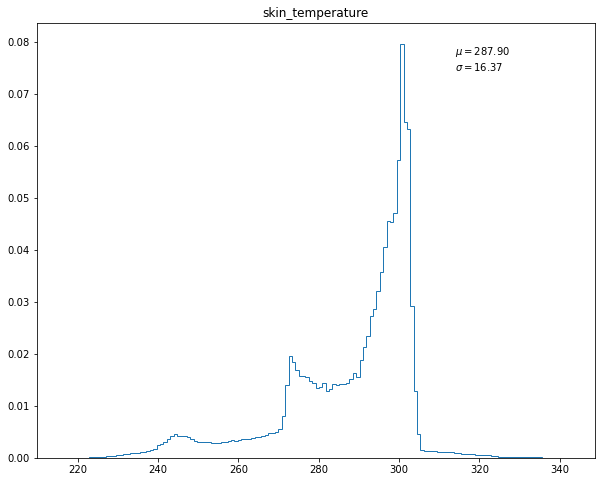

1 cos_solar_zenith_angle


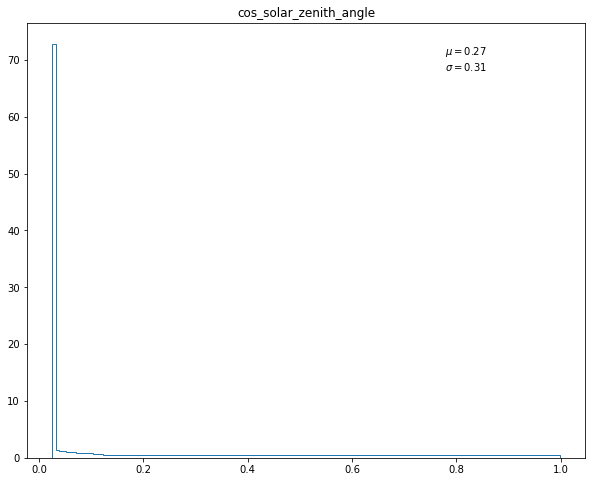

2 sw_albedo_band_0


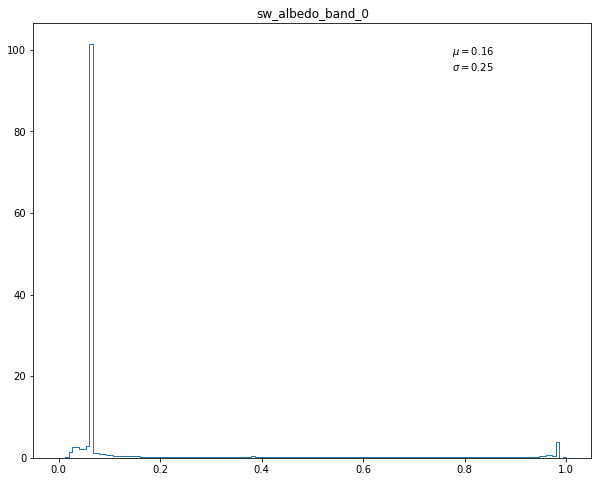

3 sw_albedo_band_1


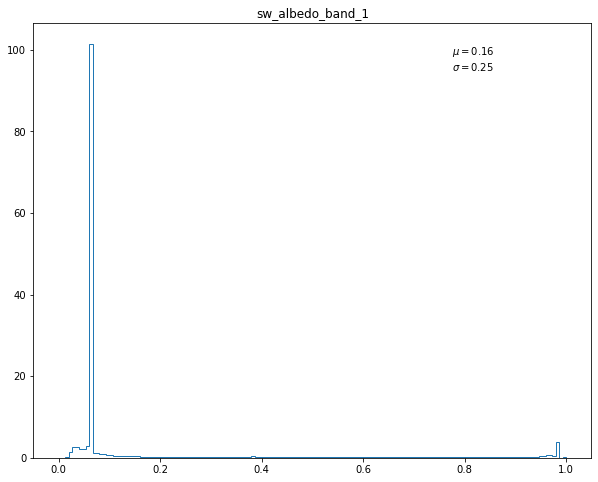

4 sw_albedo_band_2


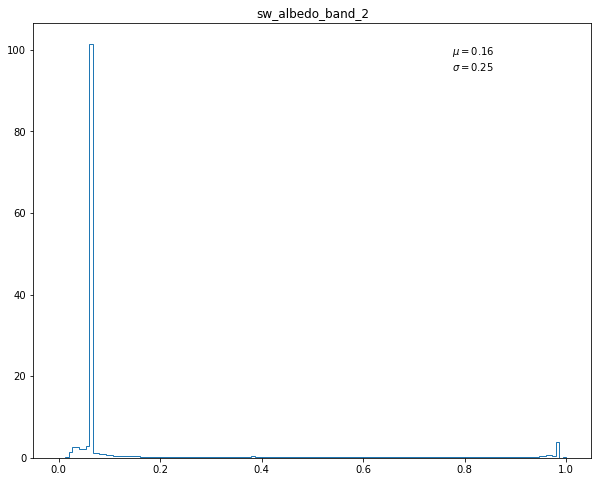

5 sw_albedo_band_3


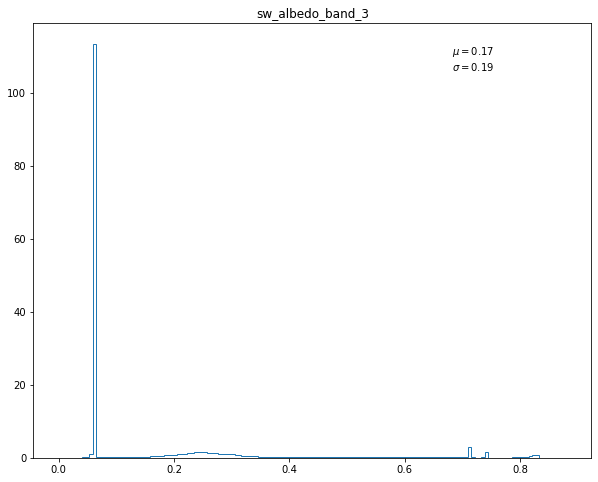

6 sw_albedo_band_4


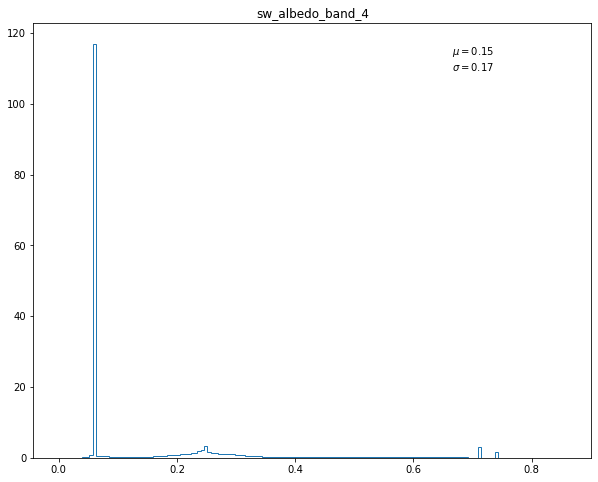

7 sw_albedo_band_5


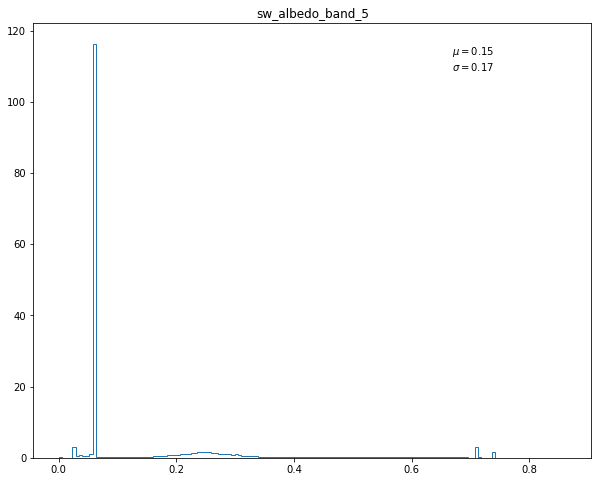

8 sw_albedo_direct_band_0


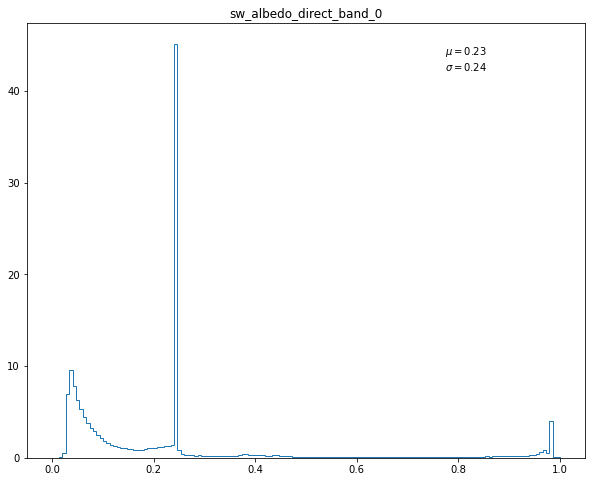

9 sw_albedo_direct_band_1


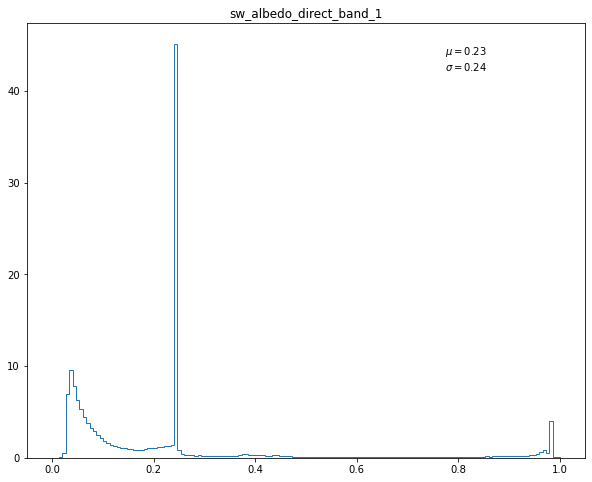

10 sw_albedo_direct_band_2


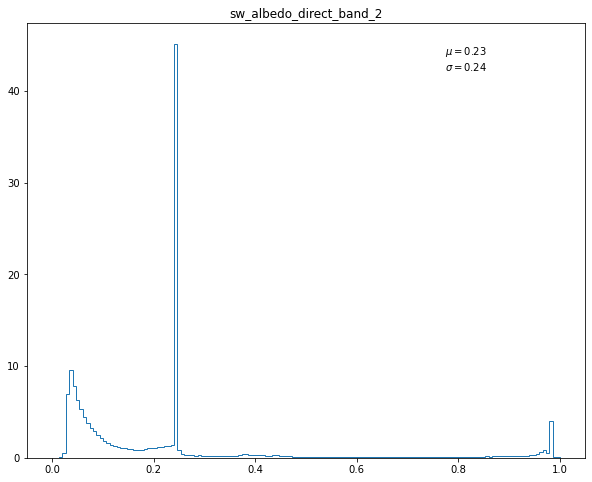

11 sw_albedo_direct_band_3


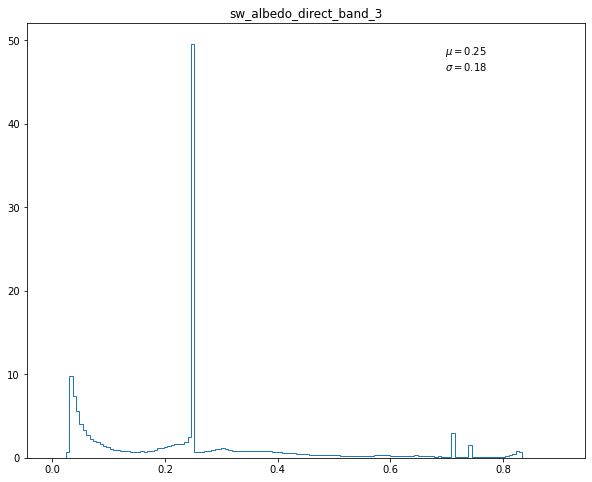

12 sw_albedo_direct_band_4


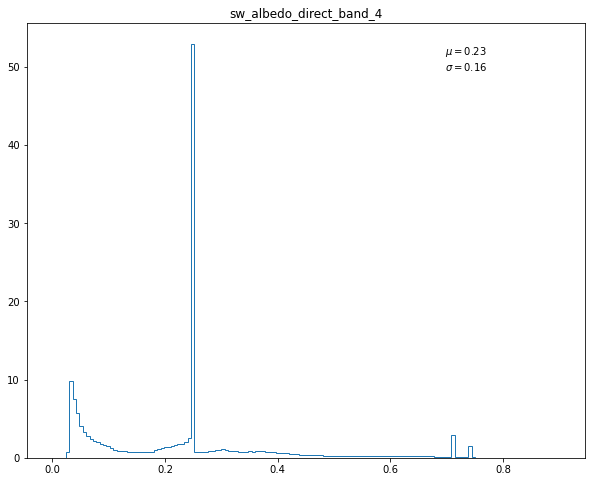

13 sw_albedo_direct_band_5


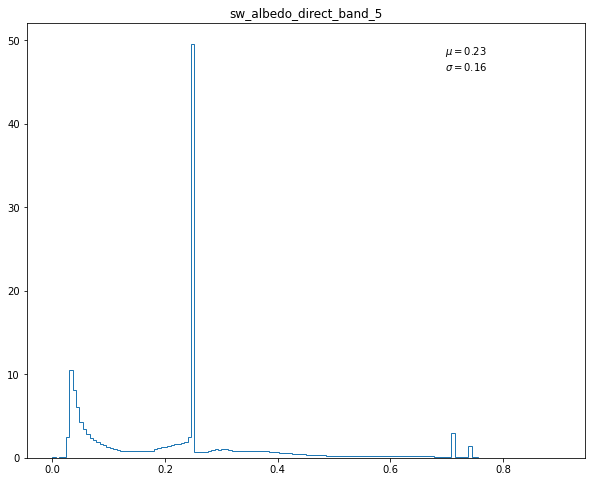

14 lw_emissivity_band_0


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


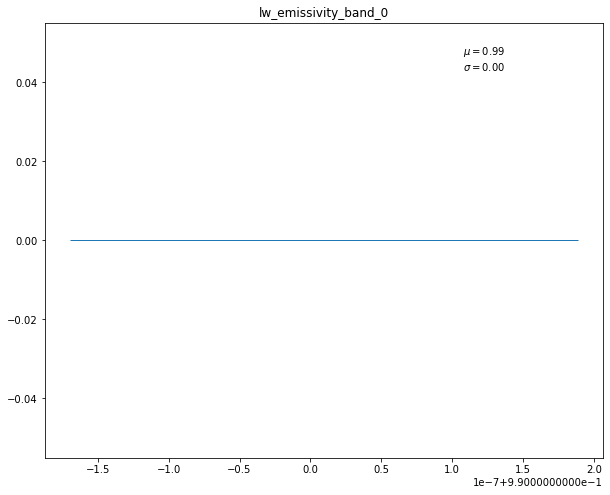

15 lw_emissivity_band_1


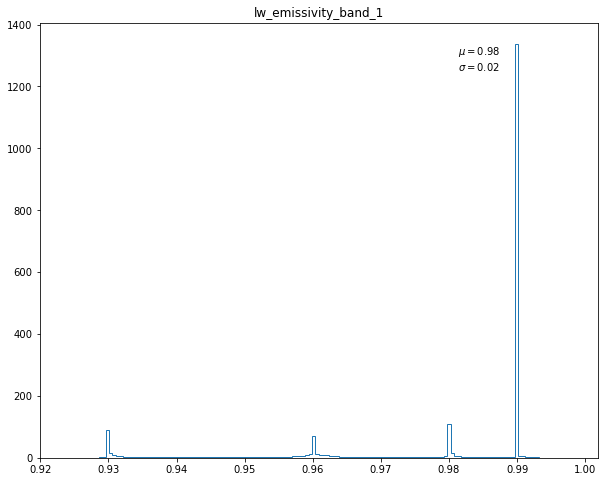

16 solar_irradiance


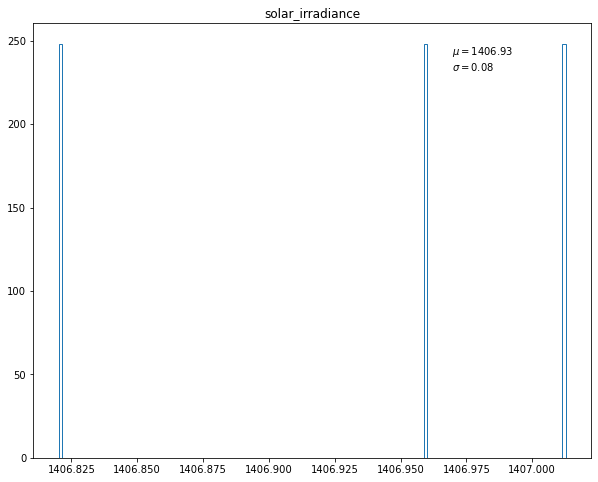

In [12]:
for i in range(ds.dims.get('sca_variable')):
    plot_sca(ds.sca_inputs[:, i], i)

0.0020087736 0.00423966


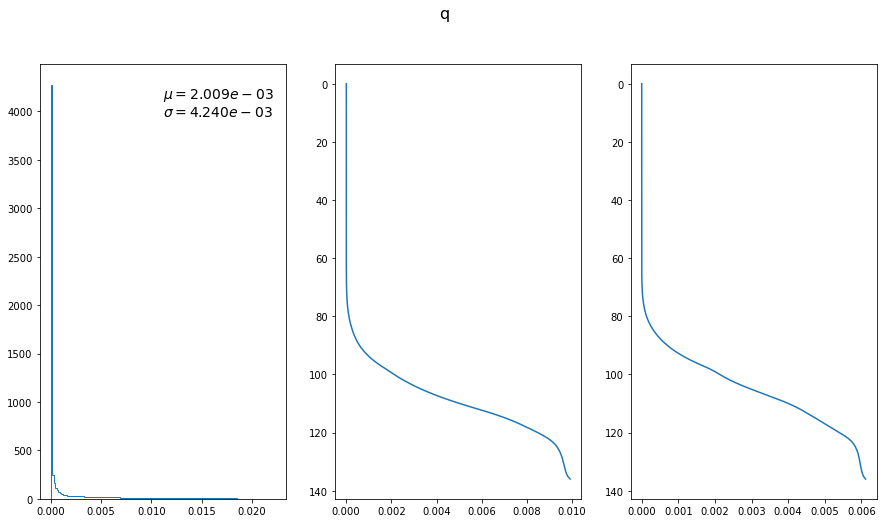

2.7618814e-06 4.3499126e-06


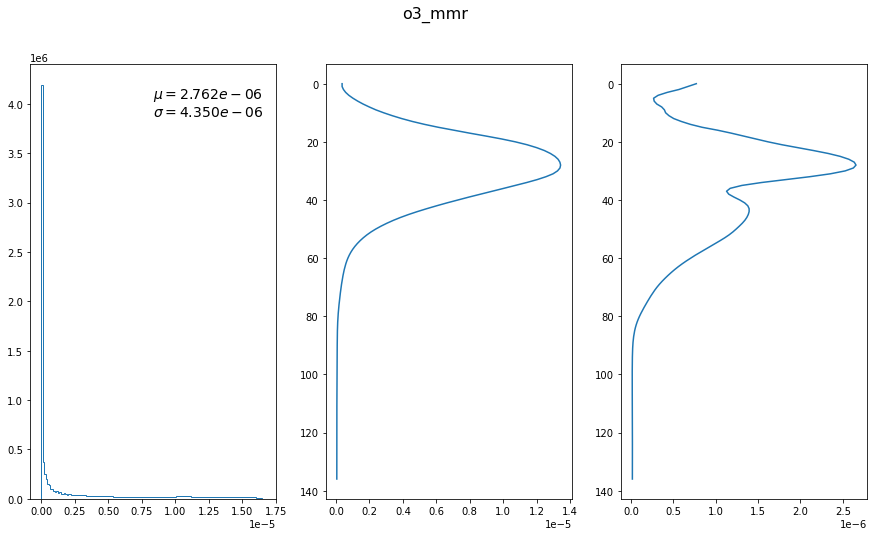

0.0004073137 4.6888113e-06


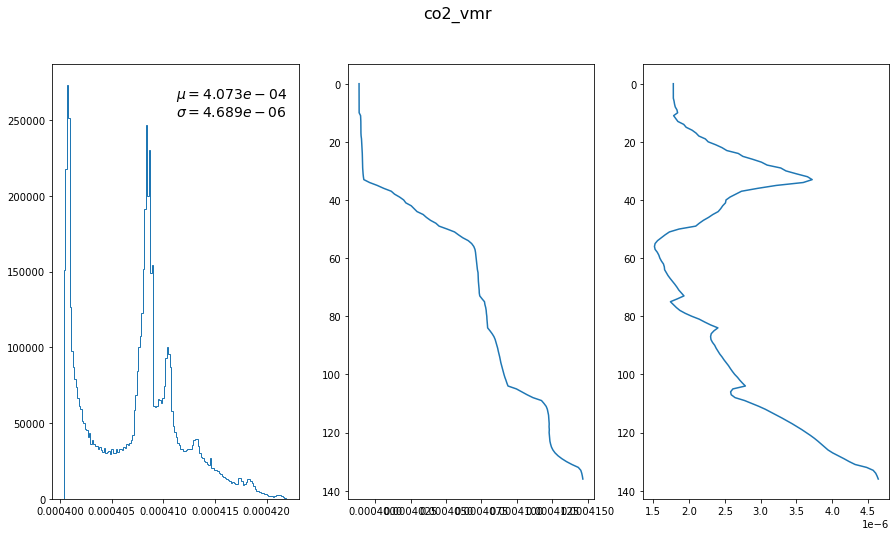

2.899248e-07 7.4909664e-08


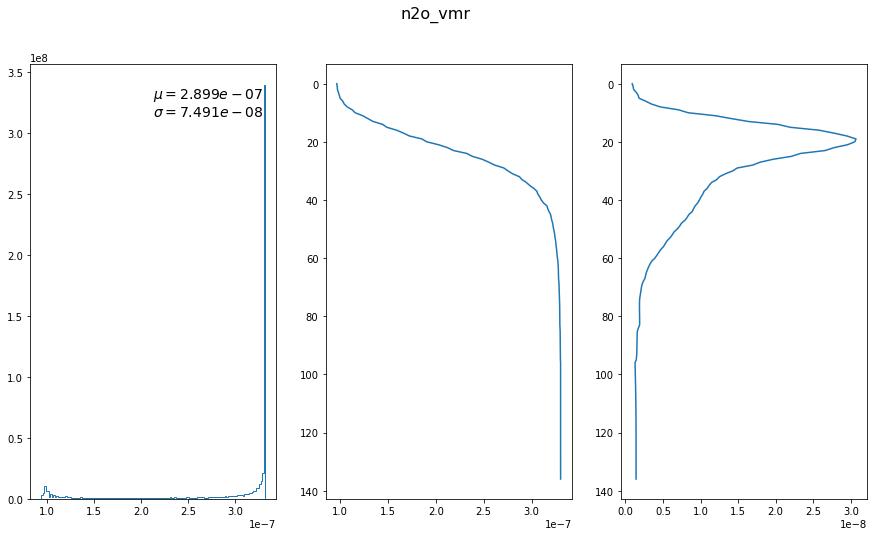

1.5261945e-06 5.587065e-07


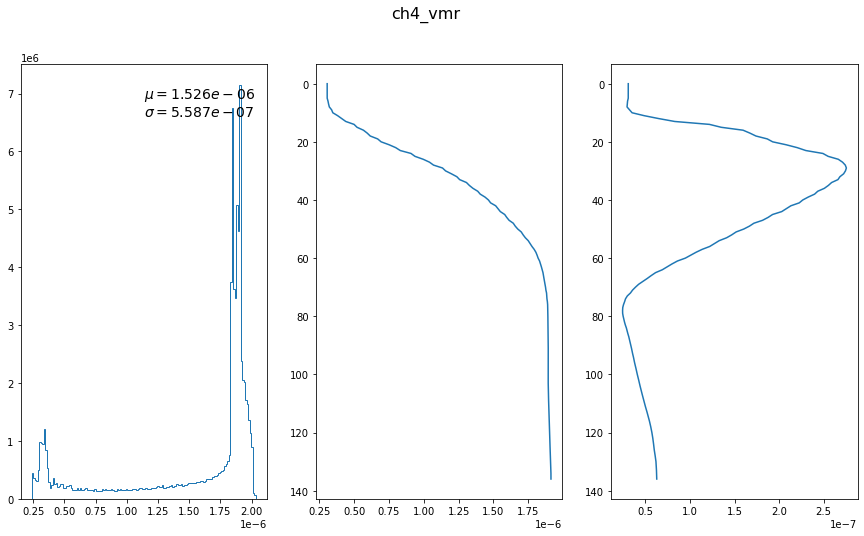

0.20945615 1.6168806e-05


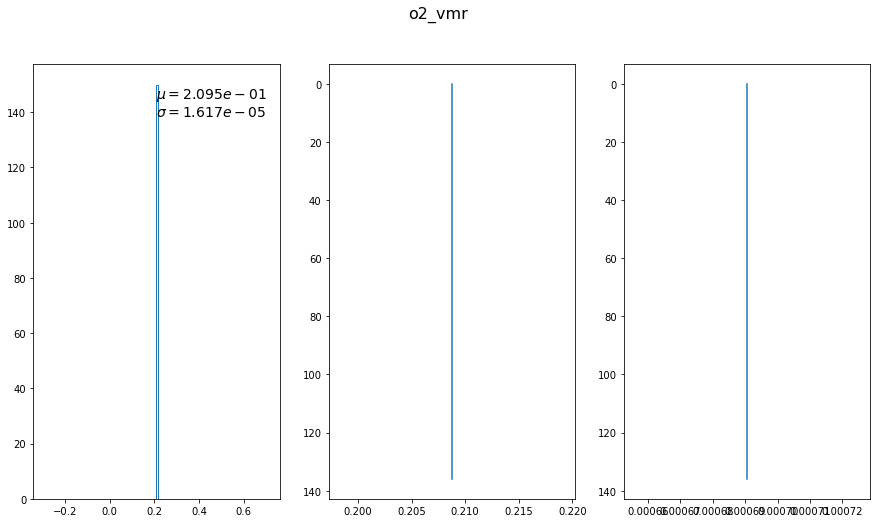

5.774853e-10 3.616756e-10


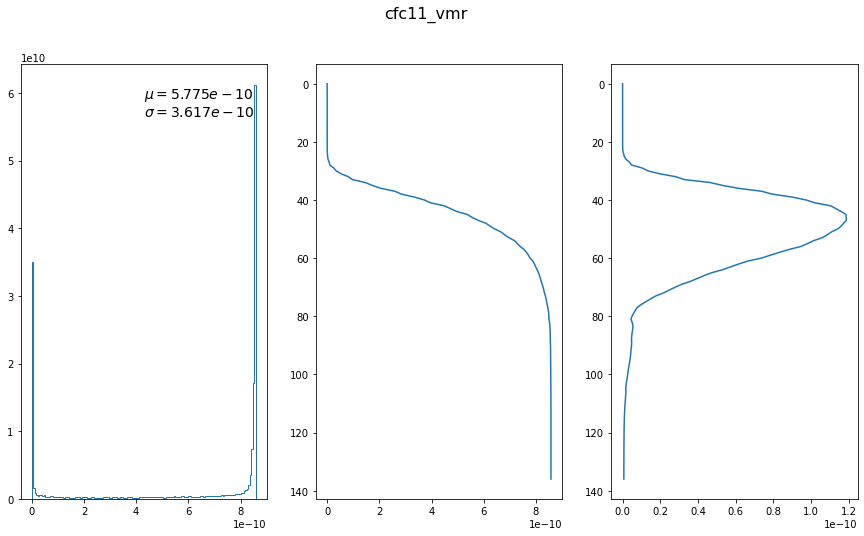

3.6403502e-10 1.9482514e-10


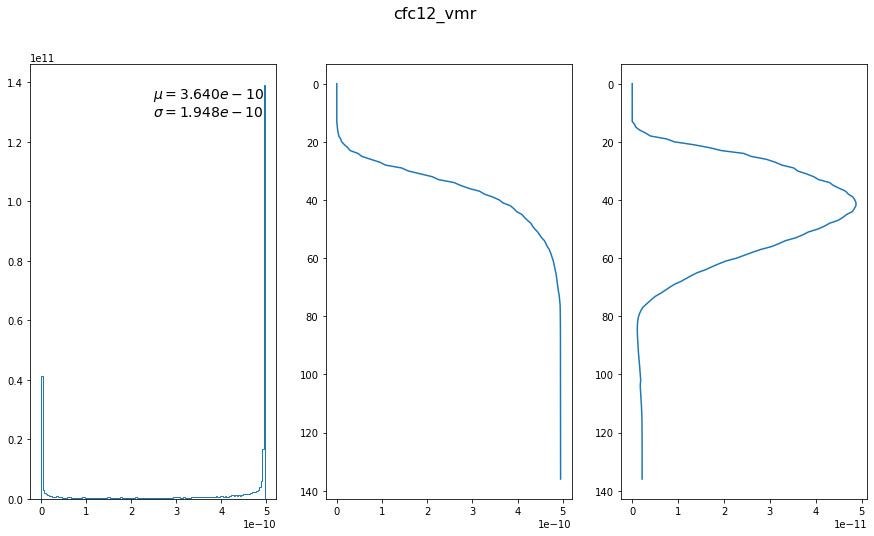

0.0 0.0


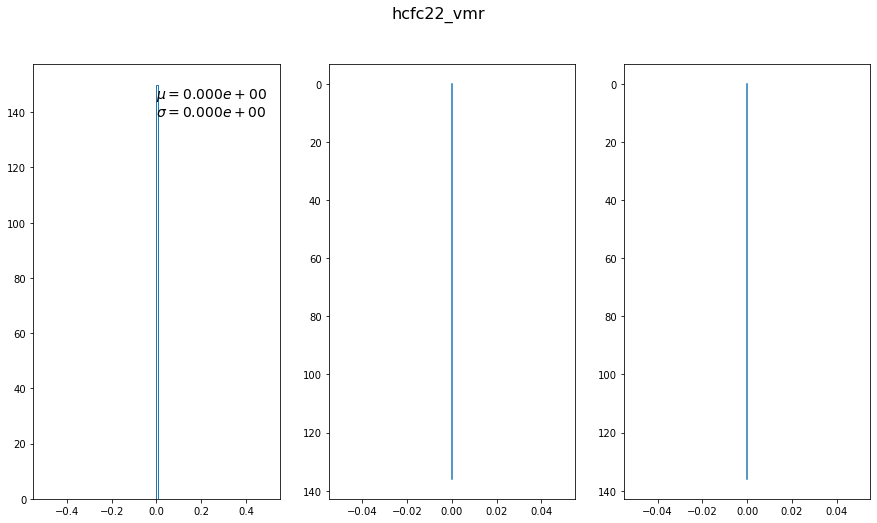

0.0 0.0


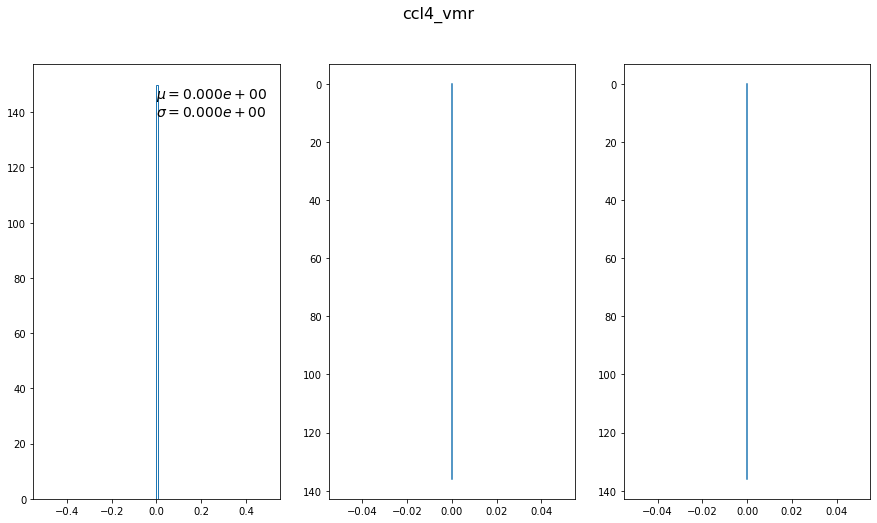

0.045028616 0.17528544


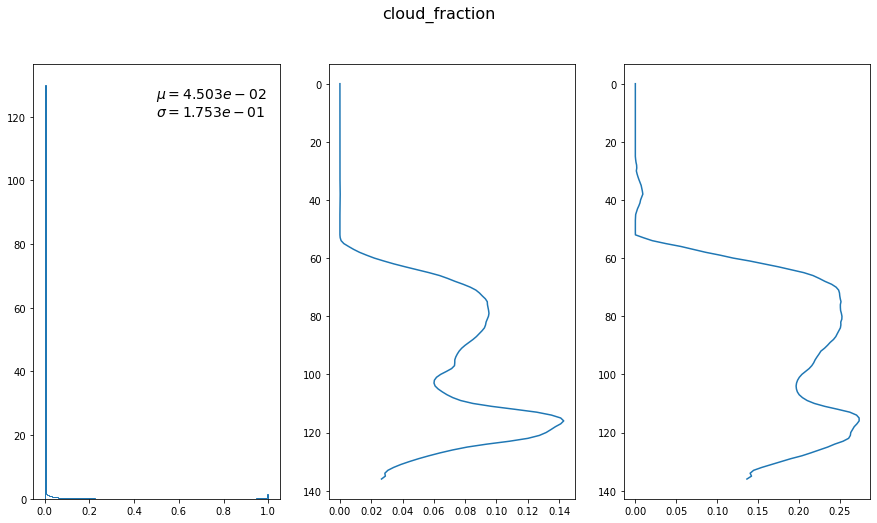

3.033048e-10 4.5240378e-10


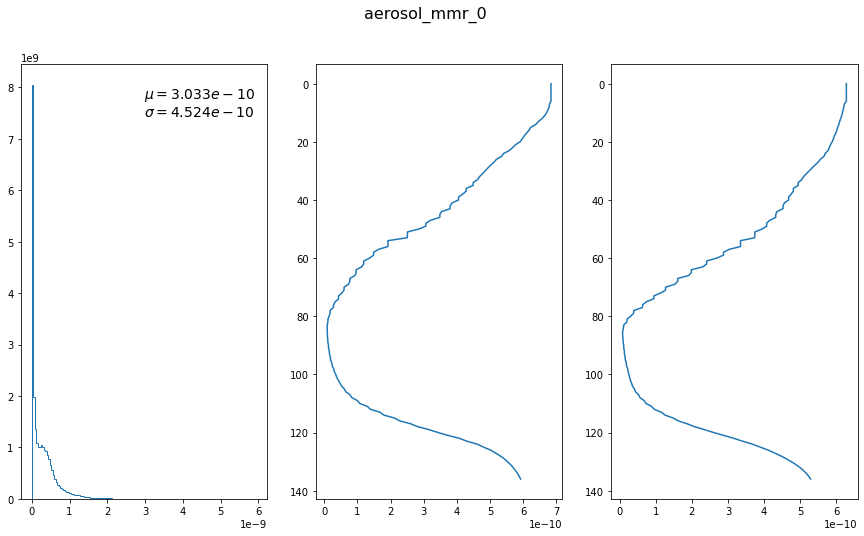

7.272749e-09 1.989594e-08


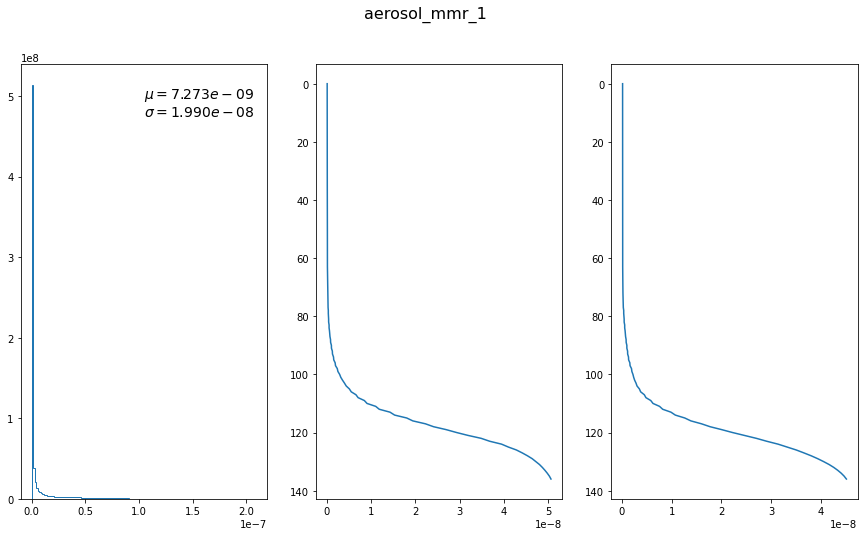

8.81178e-09 2.4171335e-08


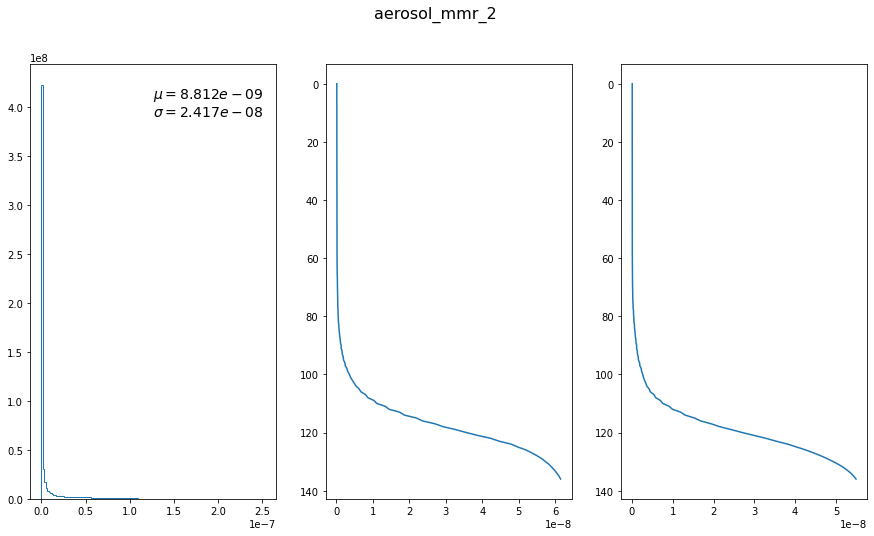

6.777304e-10 2.018625e-09


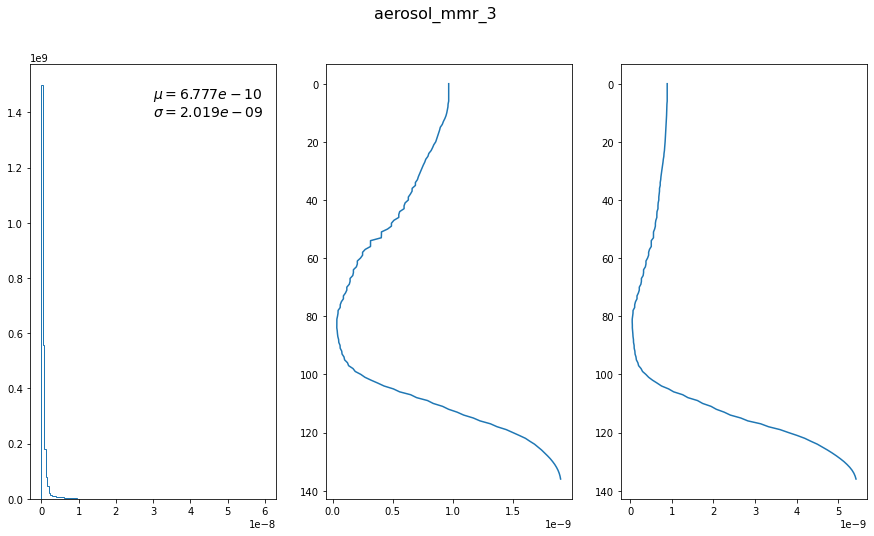

1.0802016e-09 6.046119e-09


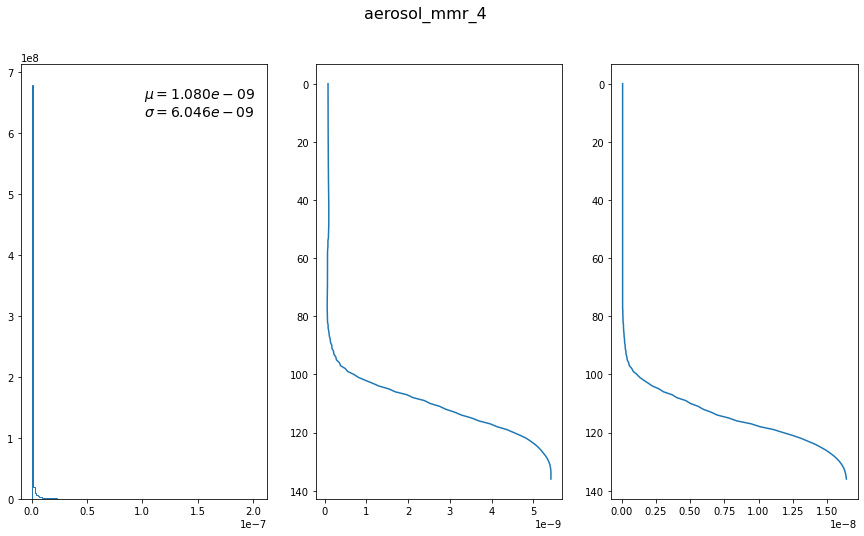

9.421449e-10 6.0705276e-09


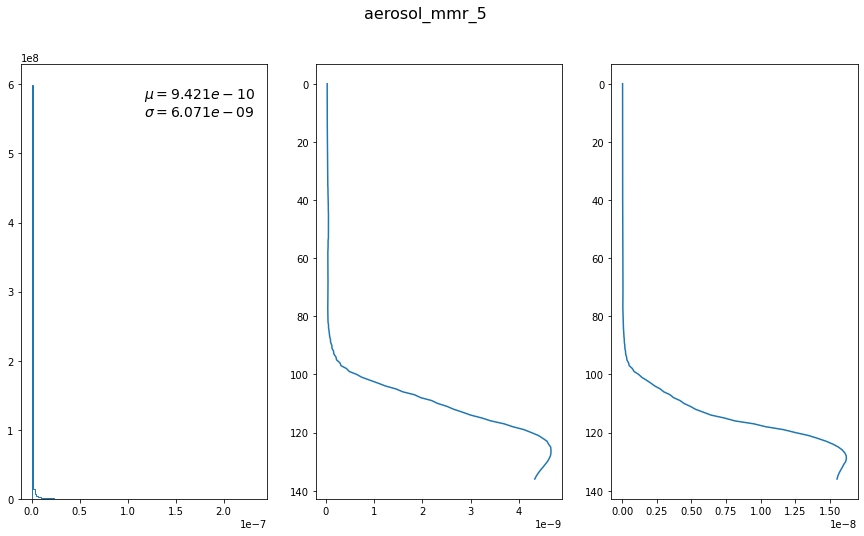

2.6462652e-10 1.1360498e-09


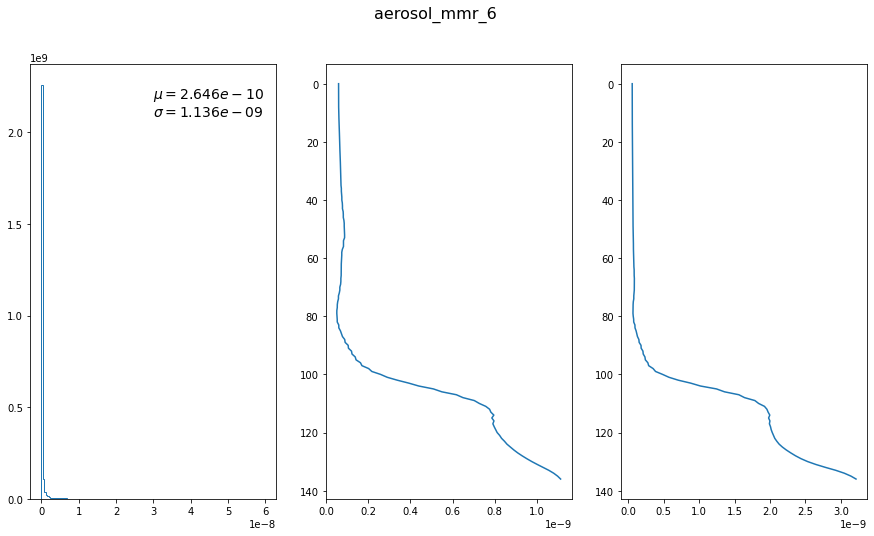

9.84609e-10 9.660772e-10


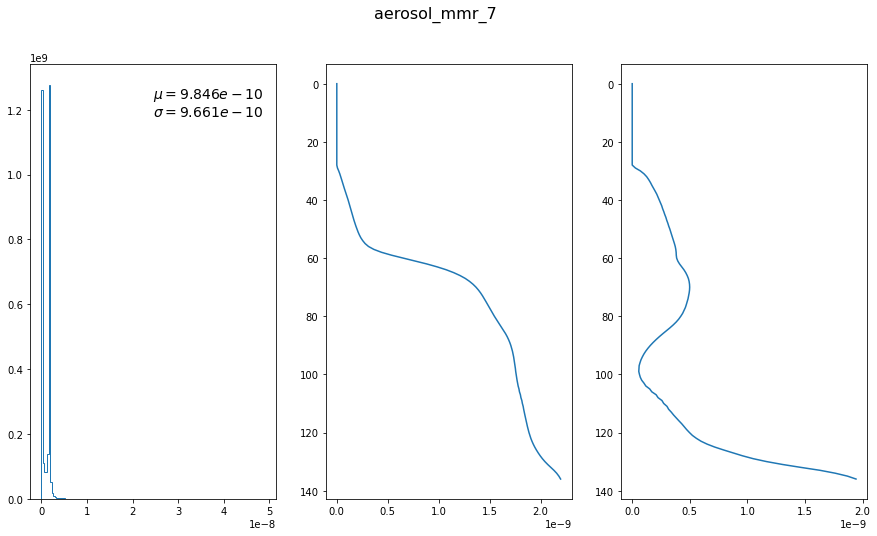

2.8763204e-11 1.2321796e-10


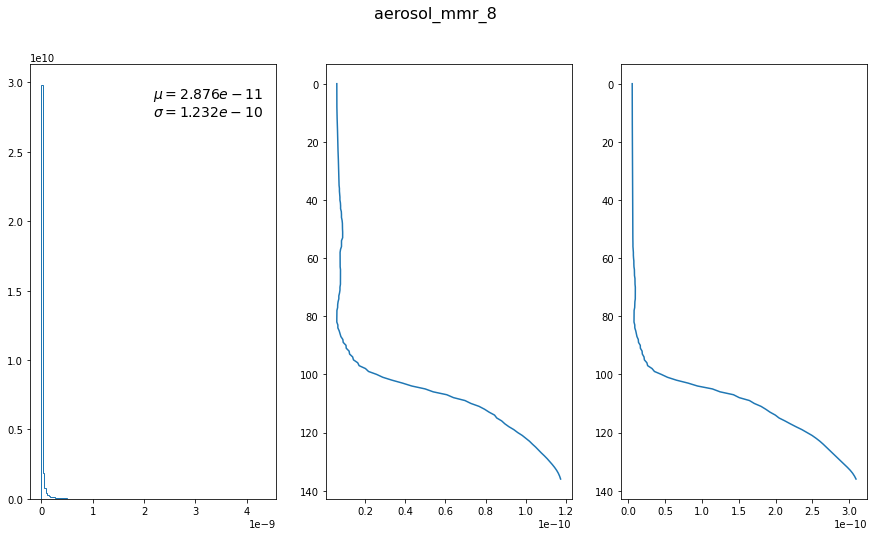

1.0109585e-11 1.00219895e-10


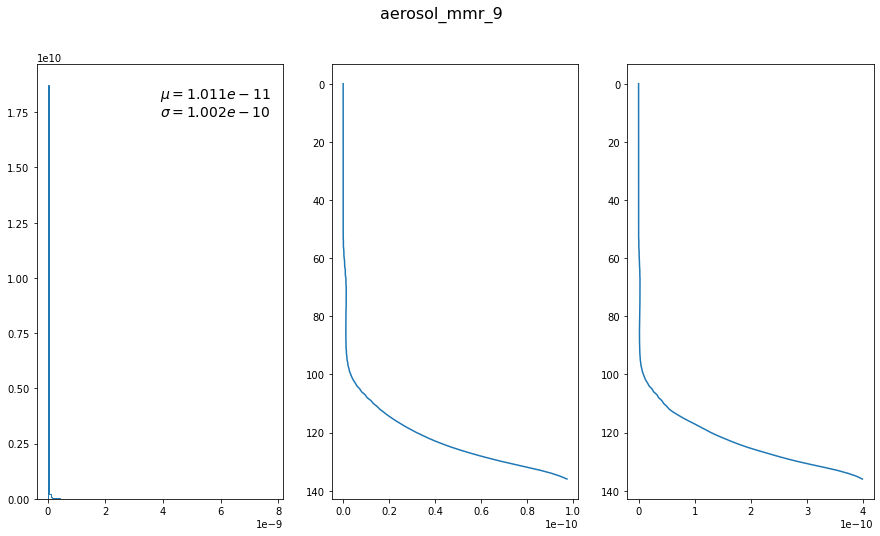

2.4317767e-10 6.497827e-10


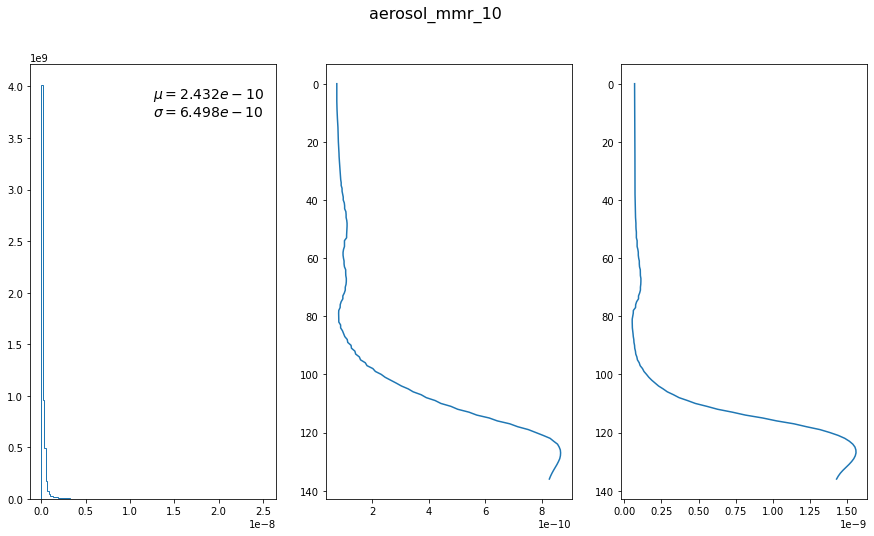

2.2081789e-10 2.2005738e-10


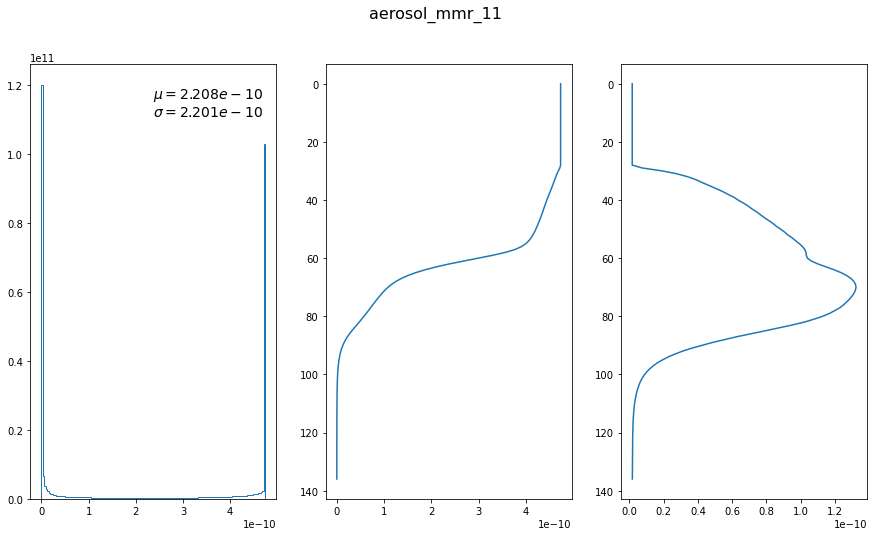

2.7638412e-06 2.0785383e-05


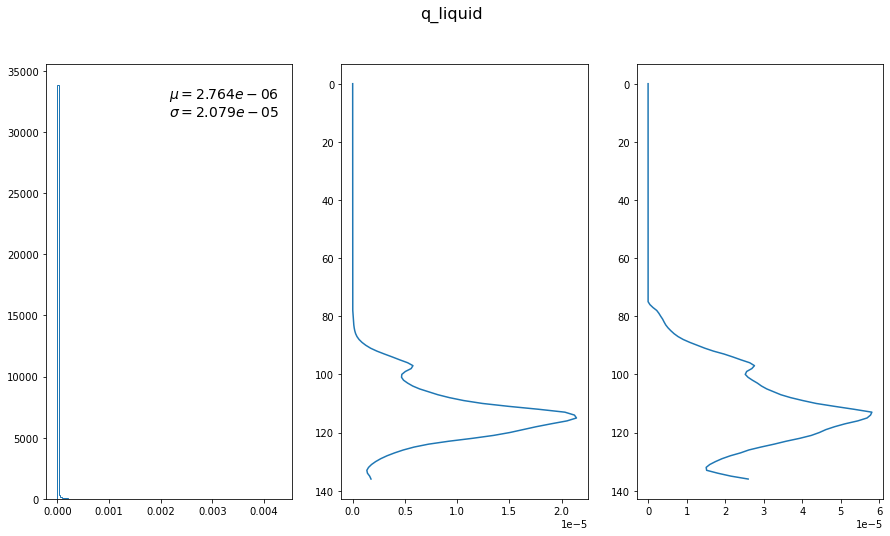

3.3490214e-06 3.5014913e-05


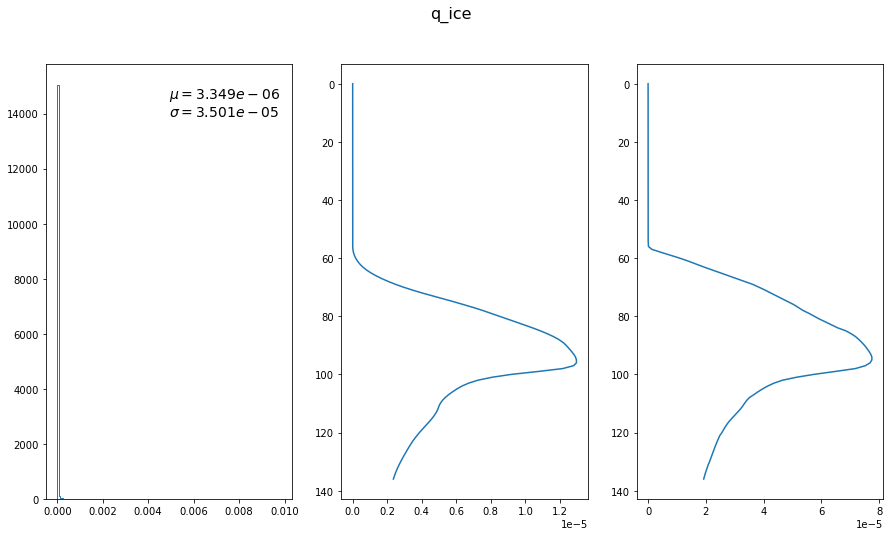

4.7644585e-06 3.2168264e-06


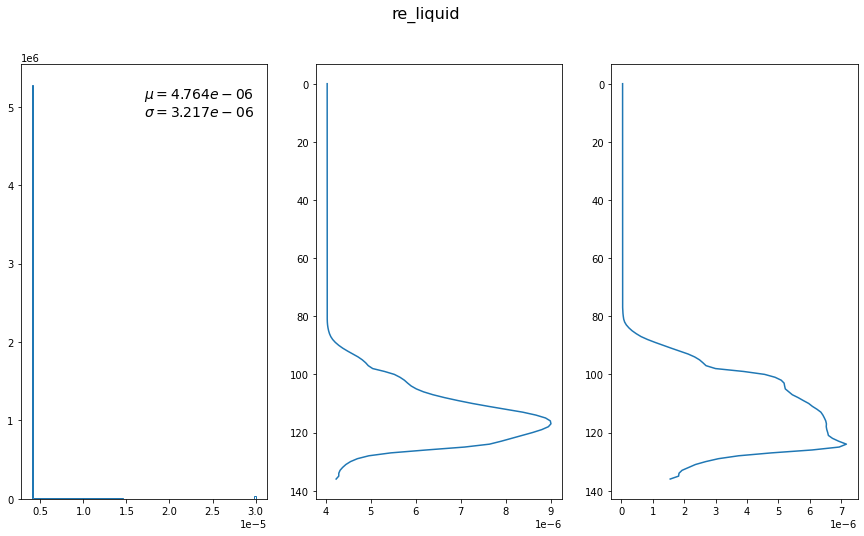

5.217318e-05 7.273264e-06


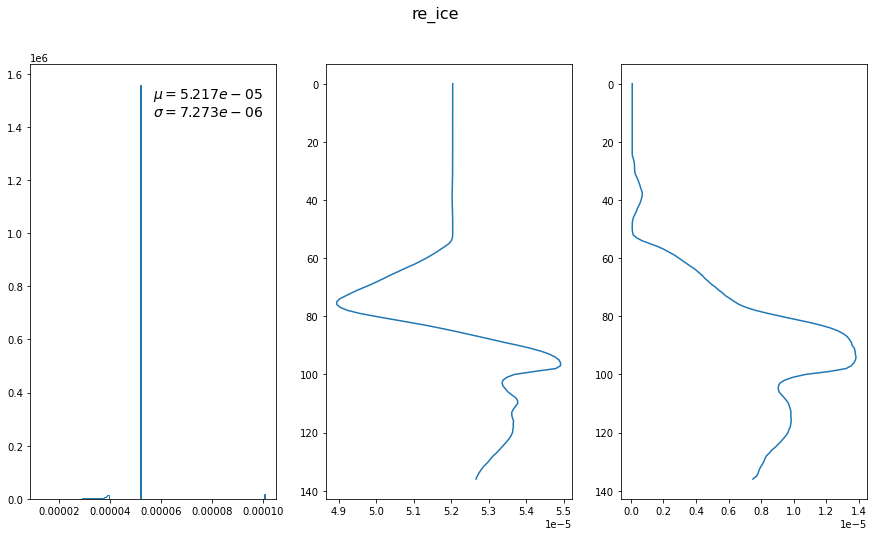

In [18]:
for i in range(ds.dims.get('col_variable')):
    plot_col(np.array(ds.col_inputs[:, :, i]), i, col_var_keys)

242.85832 30.609589


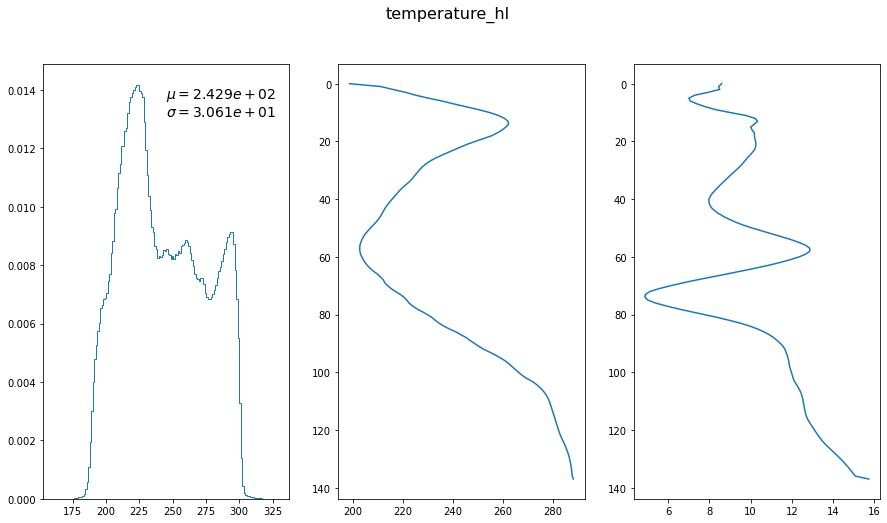

In [15]:
for i in range(ds.dims.get('hl_variable')):
    plot_col(np.array(ds.hl_inputs[:, :, i]), i, hl_var_keys)

0.79269576 0.1902629


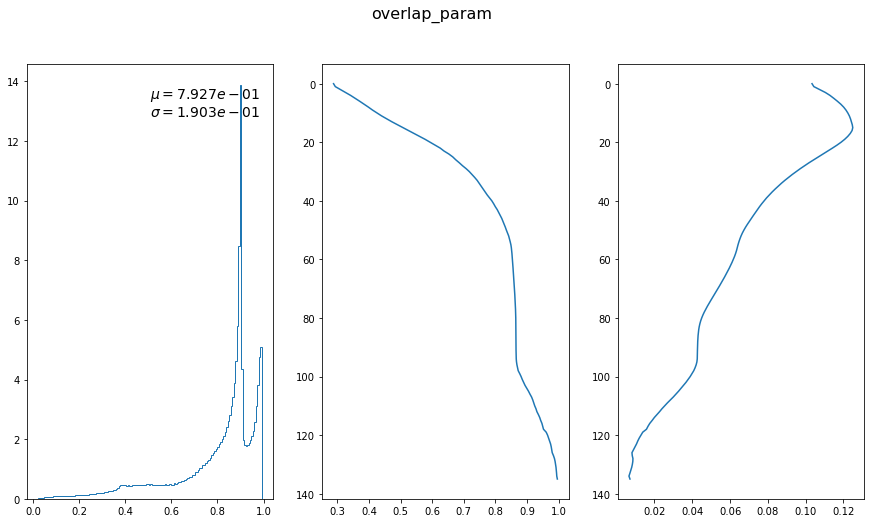

In [18]:
i = 0
plot_col(np.array(ds.inter_inputs[:, :, i]), i, inter_var_key)

0.3052898 0.7511882


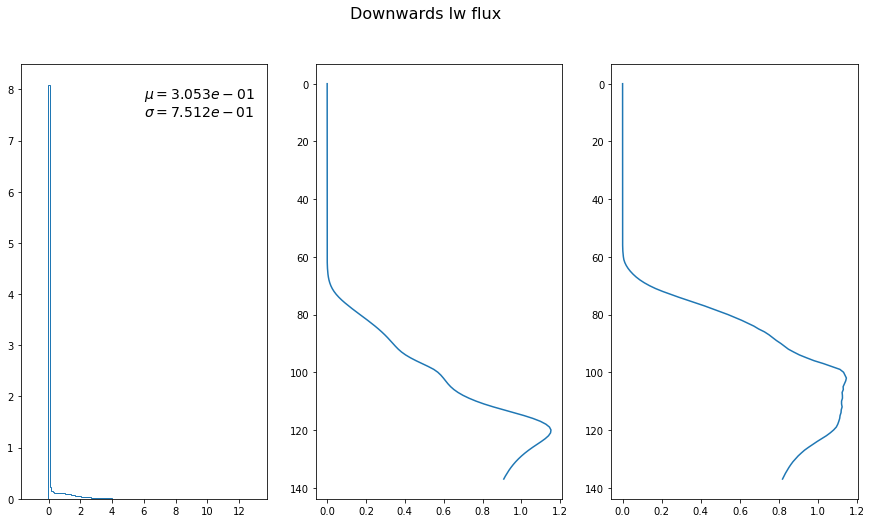

-0.6038632 0.96029824


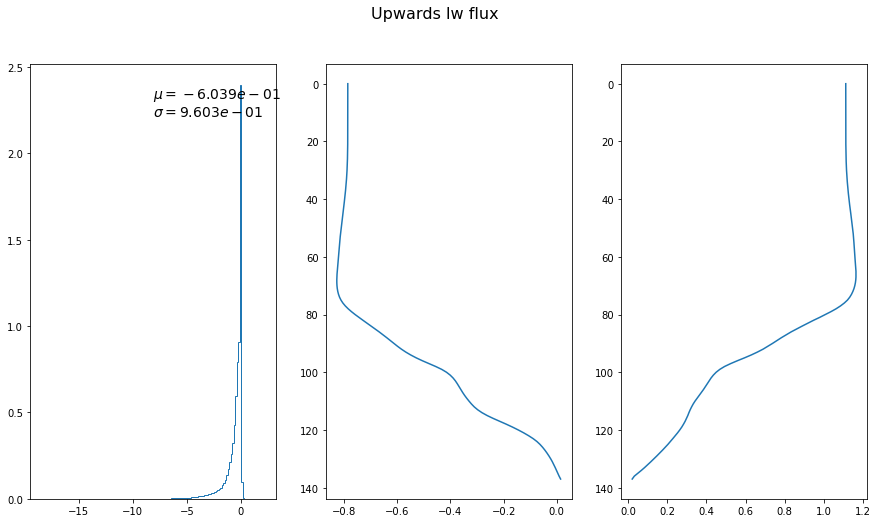

0.0021190657 1.4029474


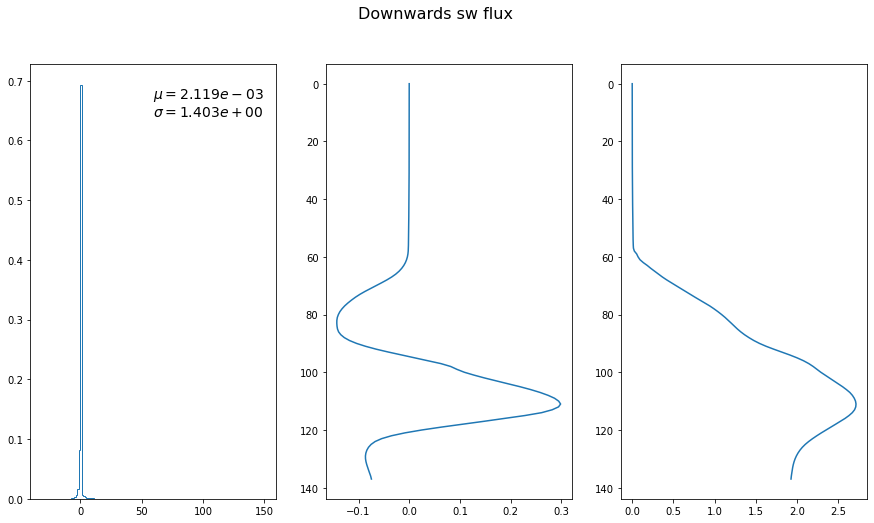

-0.6038632 0.96029824


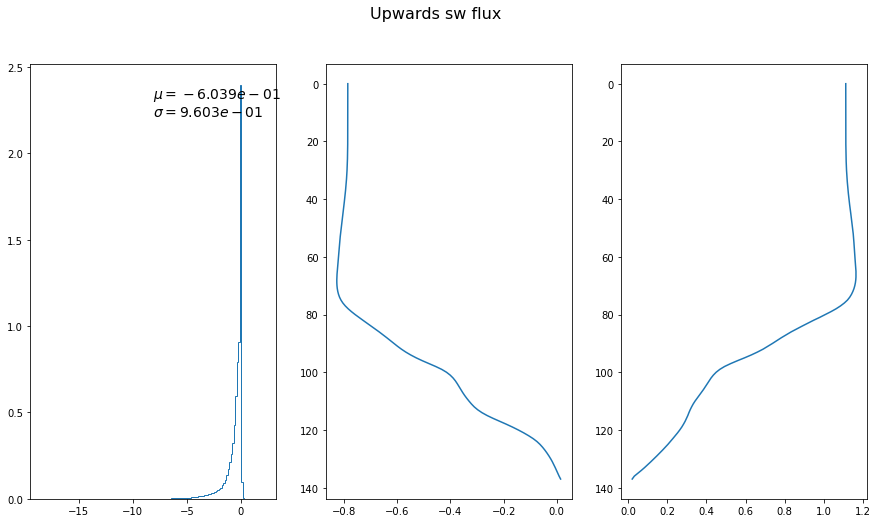

2.3165313e-08 6.198827e-07


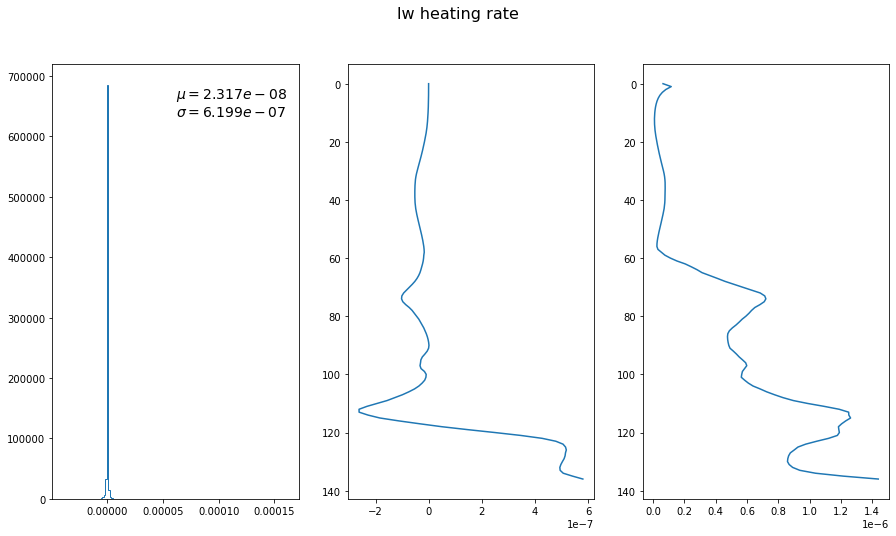

1.2495917e-08 2.5842746e-07


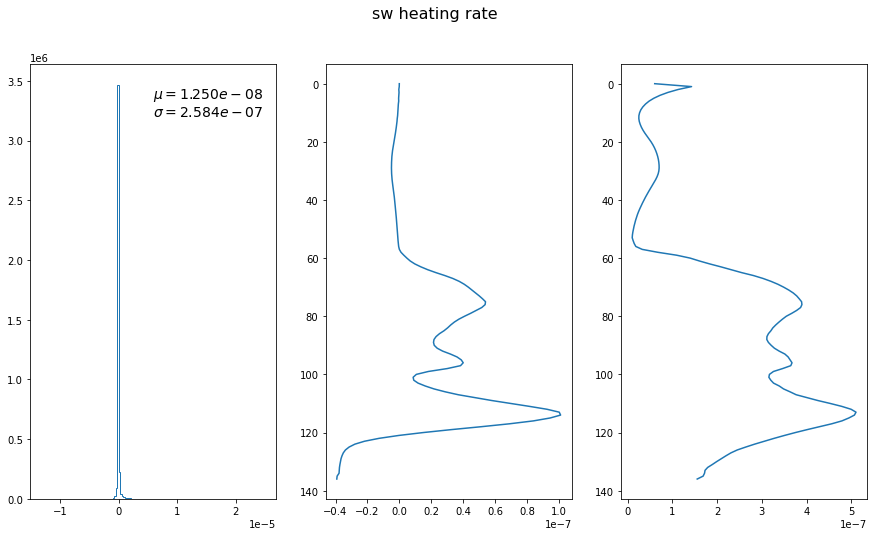

In [28]:
plot_output(np.array(ds.flux_dn_lw), name="Downwards lw flux")
plot_output(np.array(ds.flux_up_lw), name="Upwards lw flux")
plot_output(np.array(ds.flux_dn_sw), name="Downwards sw flux")
plot_output(np.array(ds.flux_up_lw), name="Upwards sw flux")
plot_output(np.array(ds.hr_lw), name="lw heating rate")
plot_output(np.array(ds.hr_sw), name="sw heating rate")